<a href="https://colab.research.google.com/github/nguyenvudev20/mse22.imageprocessing/blob/main/ImagePrcessing_baitap_18_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!apt-get install -y git
!git clone https://github.com/nguyenvudev20/mse22.imageprocessing.git dataimage

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
fatal: destination path 'dataimage' already exists and is not an empty directory.


In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
from google.colab.patches import cv2_imshow

In [16]:
Img = cv2.imread('dataimage/image/nature.jpg')
img_gray = cv2.imread('dataimage/image/nature.jpg', cv2.IMREAD_GRAYSCALE)

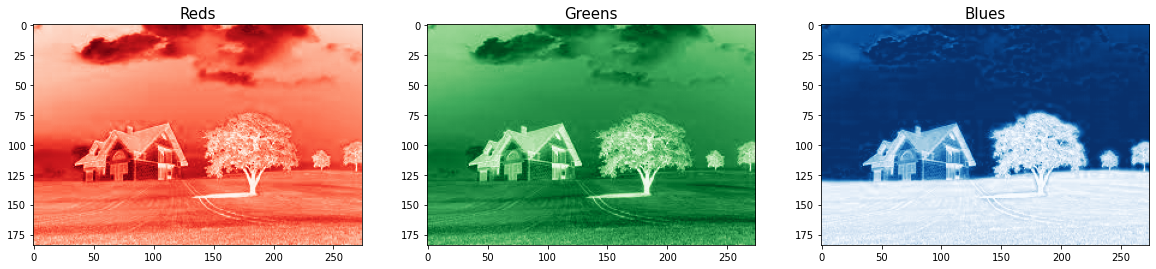

In [17]:
#@title 1. Read a color image from the Internet (i.e., nature.jpg). Display its red, green and blue component separately.
b, g, r = cv2.split(Img)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 12))
fz=15
ax[0].imshow(r, cmap='Reds')
ax[0].set_title('Reds',fontsize=fz)
ax[1].imshow(g, cmap='Greens')
ax[1].set_title('Greens',fontsize=fz)
ax[2].imshow(b, cmap='Blues')
ax[2].set_title('Blues',fontsize=fz)
plt.show()

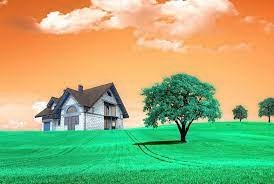

In [18]:
#@title 2. Swap the red and the blue component of the input image to create a new image (BGR), and save the new image into a new file.
swapped_img = cv2.merge((r, g, b), cv2.COLOR_BGR2RGB)
cv2.imwrite('swapped_image.jpg', swapped_img)
cv2_imshow(cv2.imread('swapped_image.jpg', cv2.COLOR_BGR2RGB))

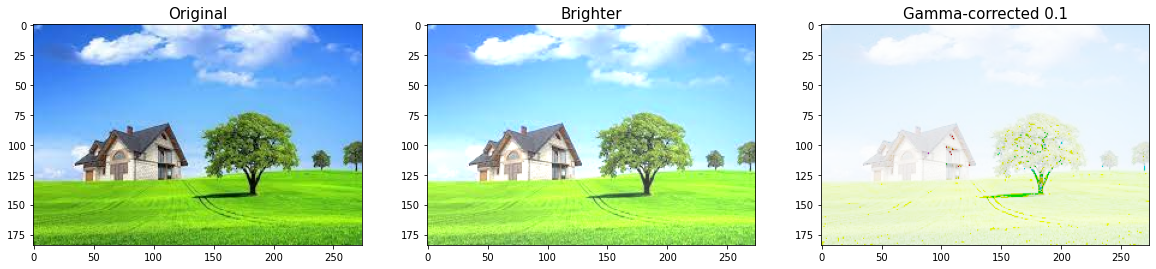

In [43]:
#@title 3. Try to make the image brighter or darker using add a constant or gamma correction. Values are optional.
bright_img = cv2.add(Img, (50, 50, 50, 0))

# Apply a gamma correction to adjust the brightness
gamma = 0.1
gamma_corr_img = np.power(Img / 255.0, gamma) * 255.0


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 12))
fz=15
ax[0].imshow(cv2.cvtColor(Img, cv2.COLOR_BGR2RGB), cmap=None)
ax[0].set_title('Original',fontsize=fz)
ax[1].imshow(cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB), cmap=None)
ax[1].set_title('Brighter',fontsize=fz)
ax[2].imshow(cv2.cvtColor(gamma_corr_img.astype(np.uint8), cv2.COLOR_BGR2RGB), cmap=None)
ax[2].set_title('Gamma-corrected '+str(gamma),fontsize=fz)
plt.show()

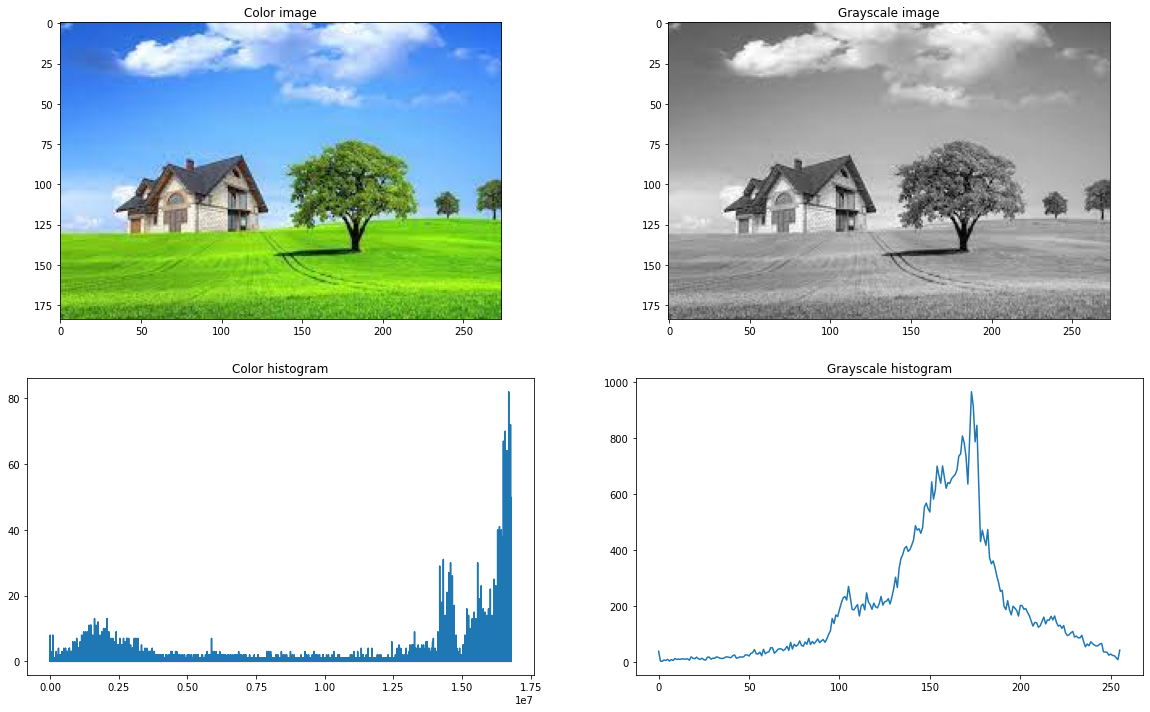

In [20]:
#@title 4. Display the image and its histogram in color and grayscale.


# Compute the color and grayscale histograms
color_hist = cv2.calcHist([Img], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
gray_hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])


# Display the color and grayscale histograms using Matplotlib
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(Img, cv2.COLOR_BGR2RGB))
plt.title('Color image')
plt.subplot(2, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale image')
plt.subplot(2, 2, 3)
plt.plot(color_hist.flatten())
plt.title('Color histogram')
plt.subplot(2, 2, 4)
plt.plot(gray_hist.flatten())
plt.title('Grayscale histogram')
plt.show()

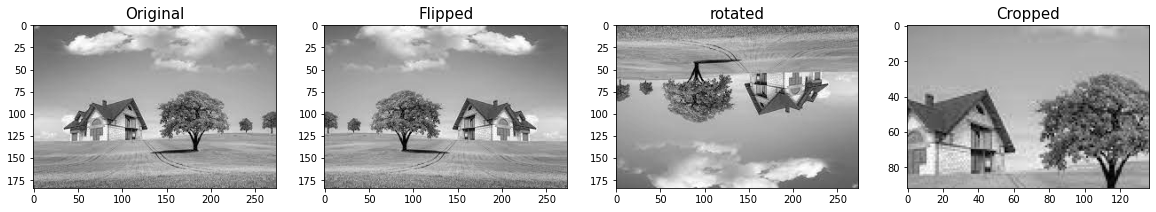

In [21]:
#@title 5. With grayscale image, do three different actions:  flip left to right, rotate clockwise 180 degrees, crop ½ central of the image


# Flip the image left to right
img_flipped = cv2.flip(img_gray, 1)
# rotated the image
img_rotated = cv2.rotate(img_gray, cv2.ROTATE_180)

# Crop the central half of the image
height, width = img_gray.shape
crop_top = int(height / 4)
crop_bottom = int(3 * height / 4)
crop_left = int(width / 4)
crop_right = int(3 * width / 4)
img_cropped = img_gray[crop_top:crop_bottom, crop_left:crop_right]
# Display
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 12))
fz=15
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original',fontsize=fz)
ax[1].imshow(img_flipped, cmap='gray')
ax[1].set_title('Flipped',fontsize=fz)
ax[2].imshow(img_rotated, cmap='gray')
ax[2].set_title('rotated',fontsize=fz)
ax[3].imshow(img_cropped, cmap='gray')
ax[3].set_title('Cropped',fontsize=fz)

plt.show()

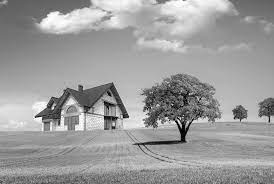

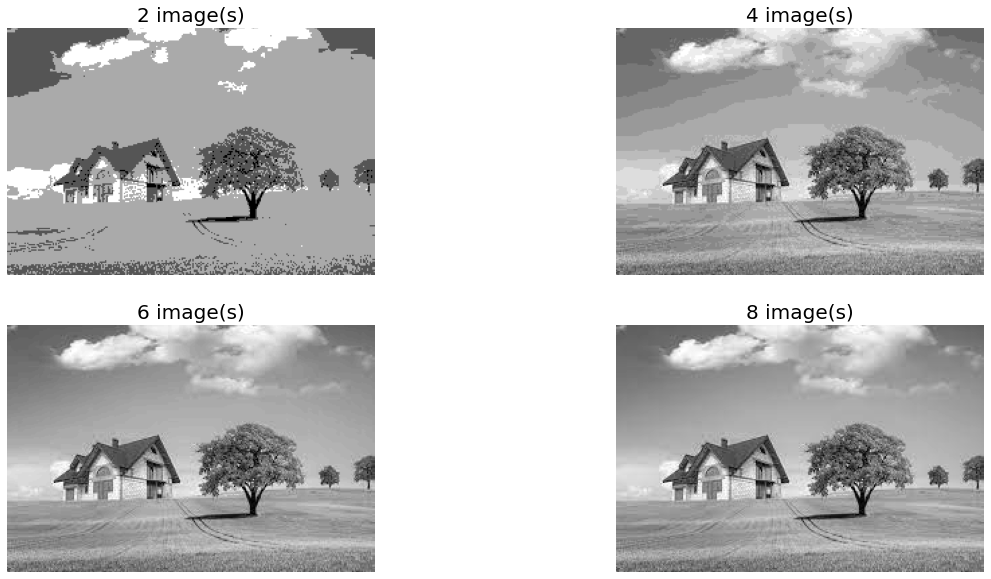

In [22]:
#@title 6. Quantize the grayscale using 2 bits, 4 bits, 6 bits and 8 bits. Visualizethe effect of the operations.

# Quantize the image using 2, 4, 6, and 8 bits
bits_list = [2, 4, 6, 8]
num_cols = len(bits_list) // 2
img_quantized_list = []
fz=20
plt.figure(figsize=(20, 10))
for bits in bits_list:
    img_quantized = np.round((img_gray / 255) * ((2 ** bits) - 1)) / ((2 ** bits) - 1)
    img_quantized = np.uint8(img_quantized * 255)
    img_quantized_list.append(img_quantized)

# Display the original and quantized images
cv2_imshow(img_gray)
for i, img_quantized in enumerate(img_quantized_list):
    plt.subplot(2, num_cols, i+1)
    plt.imshow(img_quantized, cmap='gray')
    plt.title(str(bits_list[i]) + ' image(s)',fontsize=fz)
    plt.axis('off')
plt.show()

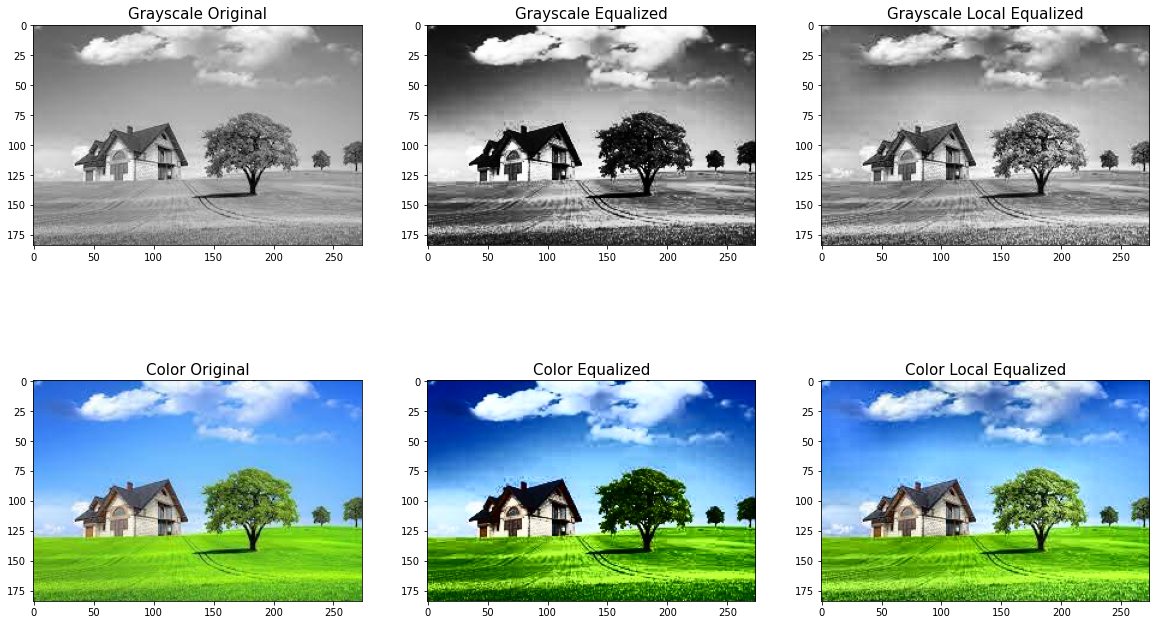

In [23]:
#@title 6. Perform histogram equalization (global and local) for grayscale and color images. Display the original and equalized ones.
# Load the grayscale and color images
img_color =cv2.imread('dataimage/image/nature.jpg');

# Perform global histogram equalization for grayscale image
img_gray_eq = cv2.equalizeHist(img_gray)

# Perform local histogram equalization for grayscale image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_gray_clahe = clahe.apply(img_gray)

# Perform global histogram equalization for color image
img_color_yuv = cv2.cvtColor(img_color, cv2.COLOR_BGR2YUV)
img_color_yuv[:,:,0] = cv2.equalizeHist(img_color_yuv[:,:,0])
img_color_eq = cv2.cvtColor(img_color_yuv, cv2.COLOR_YUV2BGR)

# Perform local histogram equalization for color image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_color_yuv = cv2.cvtColor(img_color, cv2.COLOR_BGR2YUV)
img_color_yuv[:,:,0] = clahe.apply(img_color_yuv[:,:,0])
img_color_clahe = cv2.cvtColor(img_color_yuv, cv2.COLOR_YUV2BGR)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fz=15
ax[0,0].imshow(img_gray, cmap='gray')
ax[0,0].set_title('Grayscale Original',fontsize=fz)

ax[0,1].imshow(img_gray_eq, cmap='gray')
ax[0,1].set_title('Grayscale Equalized',fontsize=fz)

ax[0,2].imshow(img_gray_clahe, cmap='gray')
ax[0,2].set_title('Grayscale Local Equalized',fontsize=fz)

ax[1,0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB),cmap=None)
ax[1,0].set_title('Color Original',fontsize=fz)

ax[1,1].imshow(cv2.cvtColor(img_color_eq, cv2.COLOR_BGR2RGB),cmap=None)
ax[1,1].set_title('Color Equalized',fontsize=fz)

ax[1,2].imshow(cv2.cvtColor(img_color_clahe, cv2.COLOR_BGR2RGB),cmap=None)
ax[1,2].set_title('Color Local Equalized',fontsize=fz)
plt.show()
